<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import statistics

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
database_hh = pd.read_csv('data/hh_database.csv', sep=';')

2. Выведите несколько первых (последних строк таблицы), чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
database_hh.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


In [4]:
database_hh.tail(2)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице

In [5]:
database_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений

In [6]:
print((database_hh != '').sum())

Пол, возраст                       44744
ЗП                                 44744
Ищет работу на должность:          44744
Город, переезд, командировки       44744
Занятость                          44744
График                             44744
Опыт работы                        44744
Последнее/нынешнее место работы    44744
Последняя/нынешняя должность       44744
Образование и ВУЗ                  44744
Обновление резюме                  44744
Авто                               44744
dtype: int64


5. Выведите основную статистическую информацию о столбцах.


In [7]:
database_hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1.Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

*Совет1: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.*

*Совет2: проверяйте полученные категории, например, с помощью метода unique()*


In [8]:
def get_education(arg):
    arg = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее образование' in arg:
        return 'среднее'
database_hh['Образование'] = database_hh['Образование и ВУЗ'].apply(get_education)
# Удаляем столбец 'Образование и ВУЗ'
database_hh = database_hh.drop('Образование и ВУЗ', axis=1)

2.Теперь нас интересует столбец **"Пол/возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [9]:
def get_sex(arg):
    arg = ' '.join(arg.split(' ')[:3])
    if 'Мужчина' in arg:
        return 'М'
    elif 'Женщина' in arg:
        return 'Ж'
    
def get_age(arg):
    arg = ''.join(arg.split(' ')[3])
    return arg

database_hh['Пол'] = database_hh['Пол, возраст'].apply(get_sex)
database_hh['Возраст'] = database_hh['Пол, возраст'].apply(get_age)
# Удаляем столбец 'Пол, возраст'
database_hh = database_hh.drop('Пол, возраст', axis=1)
# Переводим возраст к целочисленному типу
database_hh['Возраст']=database_hh['Возраст'].astype(int)

3.Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-третьих, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [10]:
def get_experience(experience):
    if experience is not np.nan:
        months_keywords = ['месяц','месяца','месяцев']
        years_keywords = ['года','лет','год']
        month = 0
        year = 0
        exp_split = experience.split()
        exp_need = exp_split[:6]
        for i in range(len(exp_need)):
            if exp_split[i] in months_keywords:
                month = exp_split[i-1]
            if exp_split[i] in years_keywords:
                year = exp_split[i-1]
        return int(year)*12+int(month)
    else:
        return np.nan
    
database_hh['Опыт работы (месяцев)'] = database_hh['Опыт работы'].apply(get_experience)
# Удаляем столбец 'Опыт работы'
database_hh = database_hh.drop('Опыт работы', axis=1)

4.Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов миллионников:
    
   <code> million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [11]:
def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    arg = ' '.join(arg.split(' ')[:3])
    if 'Москва' in arg:
        return 'Москва'
    elif 'Санкт-Петербург' in arg:
        return 'Санкт-Петербург'
    elif arg in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

def get_ready_for_moving(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    else:
        return True

def get_ready_for_bisiness_trips(arg):
    if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
        return False
    elif 'командировка' not in arg:
        return False
    else:
        return True

 # Создадим отдельные признаки «Город», «Готовность к переезду», «Готовность к командировкам».

database_hh['Город'] = database_hh['Город, переезд, командировки'].apply(
    get_city)
database_hh['Готовность к переезду'] = database_hh['Город, переезд, командировки'].apply(
    get_ready_for_moving)
database_hh['Готовность к командировкам'] = database_hh['Город, переезд, командировки'].apply(
    get_ready_for_bisiness_trips)
# Удаляем столбец 'Город, переезд, командировки'
database_hh = database_hh.drop('Город, переезд, командировки', axis=1)

5.Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [12]:
# Создадим признаки-мигалки 'полная занятость', 'частичная занятость', 
 # 'проектная работа', 'волонтерство', 'стажировка' для признака 'Занятость'.
database_hh['полная занятость'] = database_hh['Занятость'].apply(lambda x: 'полная занятость' in x)
database_hh['частичная занятость'] = database_hh['Занятость'].apply(lambda x: 'частичная занятость' in x)
database_hh['проектная работа'] = database_hh['Занятость'].apply(lambda x: 'проектная работа' in x)
database_hh['волонтерство'] = database_hh['Занятость'].apply(lambda x: 'волонтерство' in x)
database_hh['стажировка'] = database_hh['Занятость'].apply(lambda x: 'стажировка' in x)

# Создадим признаки-мигалки 'полный день', 'сменный график', 'гибкий график', 
# 'удалённая работа', 'вахтовый метод' для признака 'График'.
database_hh['полный день'] = database_hh['График'].apply(lambda x: 'полный день' in x)
database_hh['сменный график'] = database_hh['График'].apply(lambda x: 'сменный график' in x)
database_hh['гибкий график'] = database_hh['График'].apply(lambda x: 'гибкий график' in x)
database_hh['удалённая работа'] = database_hh['График'].apply(lambda x: 'удалённая работа' in x)
database_hh['вахтовый метод'] = database_hh['График'].apply(lambda x: 'вахтовый метод' in x)

# Удаляем ранее созданные признаки-мигалки для признака 'Занятость':
database_hh = database_hh.drop('полная занятость', axis=1)
database_hh = database_hh.drop('частичная занятость', axis=1)
database_hh = database_hh.drop('проектная работа', axis=1)
database_hh = database_hh.drop('волонтерство', axis=1)
database_hh = database_hh.drop('стажировка', axis=1)

# Удаляем ранее созданные признаки-мигалки для признака 'График':
database_hh = database_hh.drop('полный день', axis=1)
database_hh = database_hh.drop('сменный график', axis=1)
database_hh = database_hh.drop('гибкий график', axis=1)
database_hh = database_hh.drop('удалённая работа', axis=1)
database_hh = database_hh.drop('вахтовый метод', axis=1)

# Удаляем столбцы 'График' и 'Занятость'
database_hh = database_hh.drop(['График', 'Занятость'], axis=1)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [13]:
exchange_rates = pd.read_csv('data/ExchangeRates.csv')
exchange_rates_copy = exchange_rates.copy()
exchange_rates_copy.head()

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1


In [14]:
# Переводим признак 'date' из таблицы с валютами в формат datetime:

exchange_rates_copy['date'] = pd.to_datetime(exchange_rates_copy['date'])
display(exchange_rates_copy['date'])

0      2017-12-29
1      2017-12-30
2      2017-12-31
3      2018-01-01
4      2018-02-01
          ...    
5659   2019-02-12
5660   2019-03-12
5661   2019-04-12
5662   2019-05-12
5663   2019-06-12
Name: date, Length: 5664, dtype: datetime64[ns]

In [15]:
# Переводим признак 'Обновление резюме' из таблицы с резюме 
# в формат datetime и "достаём" из него дату:

database_hh['Дата резюме'] = pd.to_datetime(database_hh['Обновление резюме'])
database_hh['Дата резюме'] = database_hh['Дата резюме'].dt.date
database_hh['Дата резюме'] = pd.to_datetime(database_hh['Дата резюме'])
display(database_hh['Дата резюме'])

0       2019-04-16
1       2019-12-04
2       2019-04-16
3       2019-08-04
4       2019-04-22
           ...    
44739   2019-04-22
44740   2019-04-22
44741   2019-09-04
44742   2019-04-26
44743   2018-05-07
Name: Дата резюме, Length: 44744, dtype: datetime64[ns]

In [16]:
# -Переводим наименование валюты в ISO-кодировку.
# -Выделяем из столбца «ЗП» сумму заработной платы в национальных валютах и наименование валюты в стандарте ISO.
# -Создаём соответствующие временные столбцы: 'salary_amount' и 'salary_currency':

def get_salary_amount(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_salary_сurrency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]
    
database_hh['salary_amount'] = database_hh['ЗП'].apply(get_salary_amount)
database_hh['salary_currency'] = database_hh['ЗП'].apply(get_salary_сurrency)

# Присоединяем к таблице с резюме таблицу с курсами по столбцам с датой 
# и названием валюты

database_hh = database_hh.merge(
    exchange_rates_copy,
    how='left',
    left_on=['salary_currency', 'Дата резюме'],
    right_on=['currency', 'date'])

# Значения close и proportion для рубля заполняем единицей 1.
# Умножим сумму желаемой заработной платы на присоединённый курс валюты (close) 
# и разделим на пропорцию (proportion). 
# Результат занесём в новый столбец «ЗП (руб)».

mask_currency = database_hh['salary_currency'] == 'RUB'
database_hh.loc[mask_currency, ['close', 'proportion']] = 1

database_hh['ЗП (руб)'] = (database_hh['salary_amount']* database_hh['close']) / database_hh['proportion']
# Удаляем столбцы 'ЗП', 'Обновление резюме', 'salary_currency', 'salary_amount'
database_hh = database_hh.drop(['ЗП', 'Обновление резюме', 'salary_currency', 'salary_amount'], axis=1)
# Удаляем столбцы 'currency', 'per', 'date', 'time', 'close', 'vol', 'proportion'
database_hh = database_hh.drop(['currency', 'per', 'date', 'time', 'close', 'vol', 'proportion'],axis=1)                           

In [17]:
 # Сохраняем изменённую таблицу в csv-файл
#database_hh.to_csv('data/hh_database_changed.csv', sep=';')

In [18]:
database_hh['ЗП (руб)'].median()/1000

59.019

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

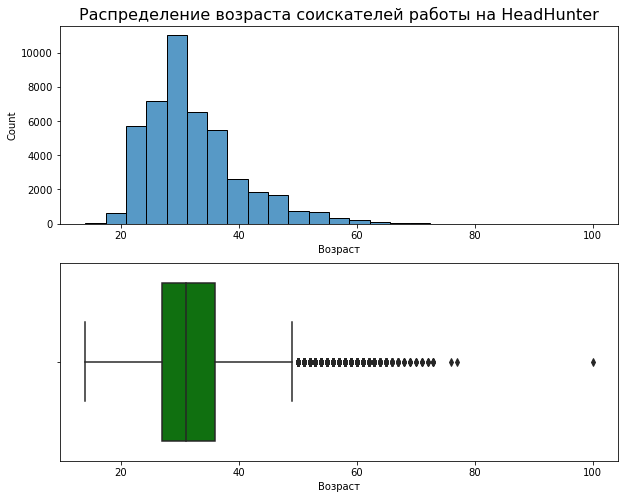

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=database_hh,
    x='Возраст',
    bins=25,
    ax=axes[0]
);
axes[0].set_title('Распределение возраста соискателей работы на HeadHunter', fontsize=16)
sns.boxplot(
    data=database_hh,
    x='Возраст',
    color='green',
    ax=axes[1]
);

### Выводы по признаку "Возраст":
#### По гистограмме видно, что мода распределения находится в районе 30 лет, по коробчатой диаграмме видно, что предельными значениями признака являются 10 и 50 лет, возраст большинства соискателей находится примерно от 28 до 35 лет. Хотя есть значения, выходящие за правое предельное значение 50 лет, их не следует относить к выбросам. К выбросу я бы отнёс единственное значение, находящееся в районе 100 лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

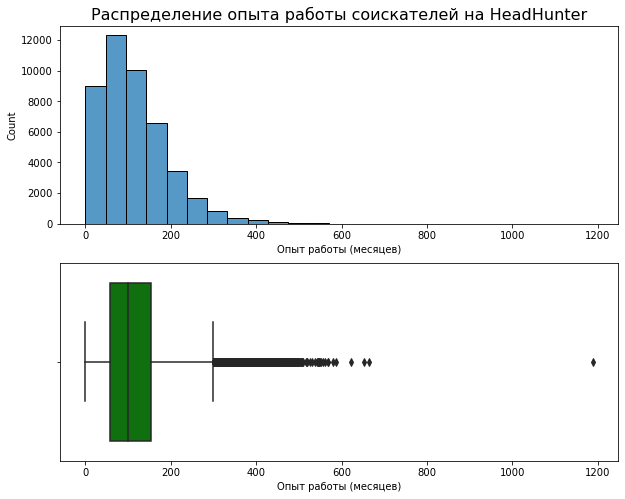

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=database_hh,
    x='Опыт работы (месяцев)',
    bins=25,
    ax=axes[0]
);
axes[0].set_title('Распределение опыта работы соискателей на HeadHunter', fontsize=16)
sns.boxplot(
    data=database_hh,
    x='Опыт работы (месяцев)',
    color='green',
    ax=axes[1]
);

### Выводы по признаку "Опыт работы (месяцев)":
#### По гистограмме видно, что мода распределения находится в районе 50 месяцев или 4 лет, по коробчатой диаграмме видно, что предельными значениями признака являются 0 и 300 месяцев или 0 и 25 лет соответственно, опыт работы большинства соискателей находится примерно от 50 до 150 месяцев, что соответствует от 4 до 12,5 лет. Хотя есть значения, выходящие за правое предельное значение 300 месяцев, я бы не стал их относить к выбросам. К выбросу я бы отнёс единственное значение, находящееся в районе 1200 месяцев или 100 лет.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


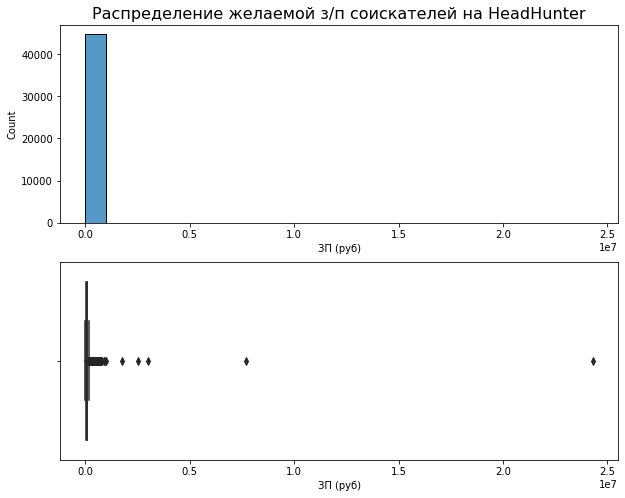

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=database_hh,
    x='ЗП (руб)',
    bins=25,
    ax=axes[0]
);
axes[0].set_title('Распределение желаемой з/п соискателей на HeadHunter', fontsize=16)
sns.boxplot(
    data=database_hh,
    x='ЗП (руб)',
    color='green',
    ax=axes[1]
);

### Выводы по признаку "ЗП (руб)":
#### По диаграммам видно, имеются выбросы в виде зарплаты в размере 24 млн.руб. Предельными значениями признака являются 1 руб. и 24 млн.руб. Заработная плата большинства соискателей находится в интевале от 37 тыс.руб. до 95 тыс.руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

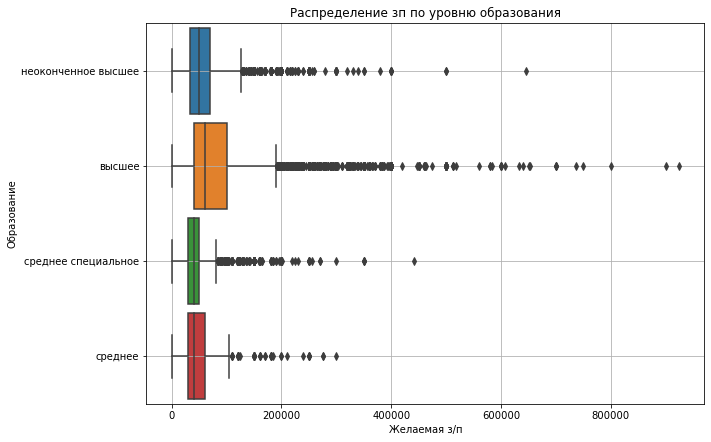

In [22]:
database_hh_filtered = database_hh[database_hh['ЗП (руб)']<1000000]

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=database_hh_filtered,
    y='Образование',
    x=database_hh_filtered['ЗП (руб)'],
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение зп по уровню образования')
boxplot.set_xlabel('Желаемая з/п')
boxplot.set_ylabel('Образование')
boxplot.grid()

### Выводы по зависимости медианной желаемой заработной платы от уровня образования
#### По диаграммам видно, медианная желаемая заработная плата коррелируется с уровнем образования: самая низкая З/П соответсвует среднему и средне-специальному образованиям, более высокая З/П соответствует соискателям с неоконченным высшим образованием и самая высокая З/П - у соискателей с высшим образованием. Учитывая это, я считаю, что признак уровня образования важен при прогнозировании заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

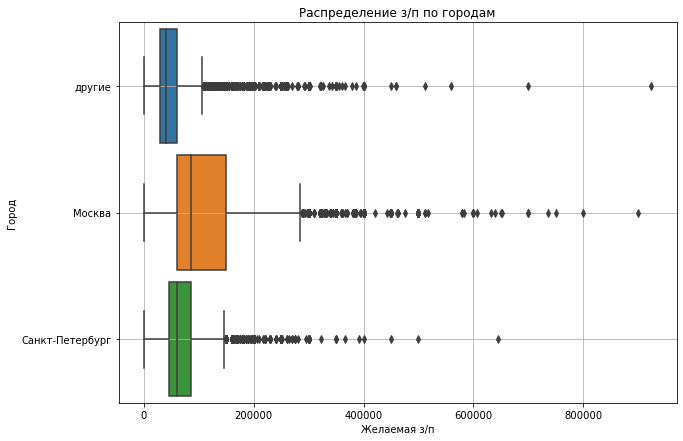

In [23]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=database_hh_filtered,
    y='Город',
    x=database_hh_filtered['ЗП (руб)'],
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение з/п по городам')
boxplot.set_xlabel('Желаемая з/п')
boxplot.set_ylabel('Город')
boxplot.grid()

### Выводы по зависимости медианной желаемой заработной платы от города
#### По диаграммам видно, медианная желаемая заработная плата самая высокая в Москве, чуть меньше - в Санкт-Петербурге, затем следуют другие города. Я считаю, что при прогнозировании заработной платы необходимо выделять в отдельные категории города Москва и Санкт-Петербург, другие российские города-миллионники  и остальные города России.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

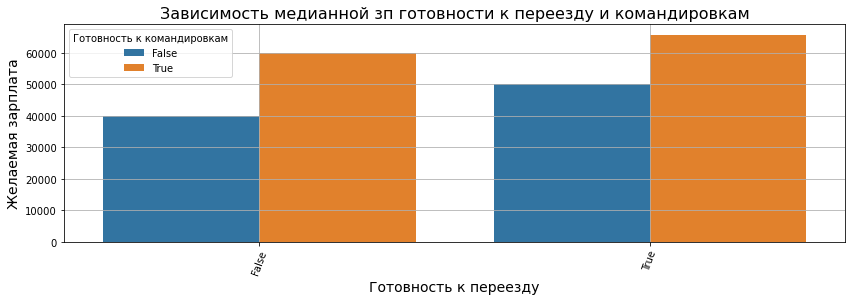

In [24]:
bar_data = database_hh.groupby(['Готовность к командировкам', 'Готовность к переезду'],
     as_index=False)['ЗП (руб)'].median()

fig = plt.figure(figsize=(14, 4))
barplot = sns.barplot(
    data=bar_data,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    orient='v',
    ci=None
)
barplot.tick_params(axis='x', rotation=70)
barplot.set_title(
    'Зависимость медианной зп готовности к переезду и командировкам', fontsize=16)
barplot.set_xlabel('Готовность к переезду', fontsize=14)
barplot.set_ylabel('Желаемая зарплата', fontsize=14)
barplot.grid()

### Выводы по зависимости медианной заработной платы "ЗП (руб)" от признаков "Готовность к переезду" и "Готовность к командировкам"

#### По диаграммам видно, что соискатели готовые к командировкам претендуют на больший уровень заработной платы. При этом соискатели которые готовы к переезду претендуют на больший уровень заработной платы независимо от того, готовы они к командировкам или нет.

In [25]:
print(bar_data)

   Готовность к командировкам  Готовность к переезду   ЗП (руб)
0                       False                  False  40000.000
1                       False                   True  50000.000
2                        True                  False  60000.000
3                        True                   True  65849.455


7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [26]:
# Строим сводную таблицу:

pivot=database_hh.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    fill_value=0
).round()
pivot

Образование,высшее,неоконченное высшее,среднее,среднее специальное
Возраст,,,,
14,60000.0,0.0,0.0,0.0
15,0.0,0.0,10000.0,2000.0
16,122582.0,0.0,0.0,32000.0
17,90076.0,80000.0,44000.0,27156.0
18,32897.0,30204.0,40833.0,30214.0
...,...,...,...,...
72,60000.0,0.0,0.0,0.0
73,62500.0,0.0,0.0,0.0
76,45000.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Тепловая карта')

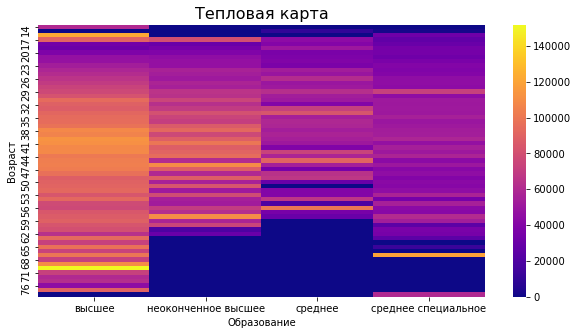

In [27]:
# Строим тепловую карту по данным сводной таблицы:

pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта', fontsize=16)

### Выводы по зависимости медианной заработной платы "ЗП (руб)" от признаков "Возраст" и "Образование"

#### Раскрасим тепловую карту таким образом, чтобы более высоким уровням зарплат соответствовали более тёплые цвета (от жёлтого до красного) и более низким уровням - холодные цвета (от сиреневого до синего). 
#### Тепловая карта показывает, что преобладание тёплых цветов у соискателей с высшим и неоконченным высшим образованиями. У соискателей же со средним и средним специальным образованиями преобладают холодные цвета.
#### Причём внутри каждой группы с одинаковым образованием уровень зарплаты выше у соискателей в возрасте от 30 до 55 лет.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

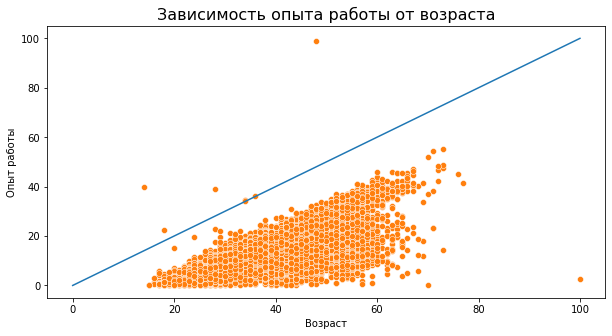

In [28]:
# Опыт работы перевожу в годы:

database_hh['Опыт работы (годы)'] = database_hh['Опыт работы (месяцев)']/12
fig = plt.figure(figsize=(10, 5))

# Строю диаграмму рассеяния:

scatterplot = sns.scatterplot(
    data=database_hh,
    x='Возраст',
    y='Опыт работы (годы)',
    s=25,
)
scatterplot.set_title('Зависимость опыта работы от возраста', fontsize=16)
scatterplot.set_xlabel('Возраст')
scatterplot.set_ylabel('Опыт работы');

# Строю прямую:

sns.lineplot(x=[0, 100], y=[0, 100])
ax = sns.scatterplot(
    data=database_hh,
    x='Возраст',
    y='Опыт работы (годы)',
)

In [29]:
# Определяю, сколько точек лежит выше прямой y=x

print(database_hh[database_hh['Опыт работы (годы)']>database_hh['Возраст']].shape[0])

7


### Выводы по зависимости опыта работы от возраста

#### По диаграмме рассеяния, показывающей зависимость опыта работы от возраста, можно увидеть, что имеются резюме, в которых опыт работы соискателя больше его возраста. Таких резюме 7. На диаграмме это точки расположенные выше прямой, со значениями, когда опыт работы равен возрасту человека (что тоже невозможно). Эти точки являются аномалиями в данных. В подавляющем большинстве наблюдений возраст превышает опыт работы, что естественно.

In [30]:
# Удаляю ранее созданный столбец 'Опыт работы (годы)':
database_hh = database_hh.drop('Опыт работы (годы)', axis=1)

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [31]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [32]:
dupl_columns = list(database_hh.columns)

mask = database_hh.duplicated(subset=dupl_columns)
hh_duplicates = database_hh[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

Число найденных дубликатов: 161


In [33]:
# Число пропусков до удаления дубликатов
database_hh.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяцев)              168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Дата резюме                          0
ЗП (руб)                             0
dtype: int64

In [34]:
# Удаляем дубликаты:

database_hh = database_hh.drop_duplicates(subset=dupl_columns)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

Здесь (на платформ, на сайте, задание 5.2) имеются в виду пропуски до удаления дубликатов (их должно быть 168). Но после удаления дубликатов их становится 166.

In [35]:
# Число пропусков после удаления дубликатов:
database_hh.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяцев)              166
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Дата резюме                          0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяцев)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [36]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Опыт работы (месяцев)': database_hh['Опыт работы (месяцев)'].median(),
}
#заполняем пропуски в соответствии с заявленным словарем
database_hh = database_hh.fillna(values)
#выводим результирующую долю пропусков
database_hh.isnull().mean()

Ищет работу на должность:          0.000000
Последнее/нынешнее место работы    0.000022
Последняя/нынешняя должность       0.000045
Авто                               0.000000
Образование                        0.000000
Пол                                0.000000
Возраст                            0.000000
Опыт работы (месяцев)              0.000000
Город                              0.000000
Готовность к переезду              0.000000
Готовность к командировкам         0.000000
Дата резюме                        0.000000
ЗП (руб)                           0.000000
dtype: float64

In [37]:
# Удаляю строки, где есть пропуск в столбцах с местом работы и должностью:

database_hh = database_hh.dropna(how='any', axis=0)
database_hh.isnull().mean()

Ищет работу на должность:          0.0
Последнее/нынешнее место работы    0.0
Последняя/нынешняя должность       0.0
Авто                               0.0
Образование                        0.0
Пол                                0.0
Возраст                            0.0
Опыт работы (месяцев)              0.0
Город                              0.0
Готовность к переезду              0.0
Готовность к командировкам         0.0
Дата резюме                        0.0
ЗП (руб)                           0.0
dtype: float64

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [38]:
round(bar_data[bar_data['Готовность к командировкам'] & bar_data['Готовность к переезду']]['ЗП (руб)']/1000)

3    66.0
Name: ЗП (руб), dtype: float64

In [39]:
# Распечатываю количество выбросов в обе стороны:
litle_big = database_hh[(database_hh['ЗП (руб)'] > 1000000) | (database_hh['ЗП (руб)'] < 1000)]
print(litle_big.shape[0])

89


In [40]:
# Удаляю выбросы
database_hh = database_hh.drop(litle_big.index, axis=0)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [41]:
# Считаю количество аномальных значений:

database_hh['Опыт работы (годы)'] = database_hh['Опыт работы (месяцев)']/12
anomaly = database_hh[database_hh['Опыт работы (годы)']>database_hh['Возраст']]
print(anomaly.shape[0])

7


In [42]:
# Удаляю аномальные значения:

database_hh = database_hh.drop(anomaly.index, axis=0)
anomaly1 = database_hh[database_hh['Опыт работы (годы)']>database_hh['Возраст']]
print(anomaly1.shape[0])

0


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**? В какую сторону **асимметрично логарифмическое распределение**? Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

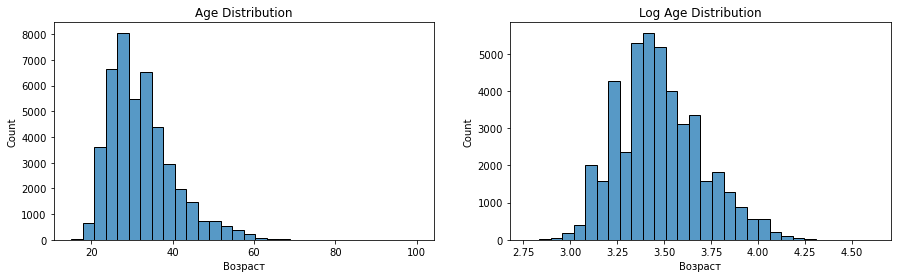

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(database_hh['Возраст'], bins=30, ax=axes[0])
histplot.set_title('Age Distribution');

#гистограмма в логарифмическом масштабе
log_database_hh = np.log(database_hh['Возраст'] + 1)
histplot = sns.histplot(log_database_hh , bins=30, ax=axes[1])
histplot.set_title('Log Age Distribution');

У распределения признака 'Возраст' правосторонняя асимметрия, когда медиана и мода меньше среднего. Проверить это можно вызвав методы mode() и describe(). Здесь видно, что мода равна 3.4340, медиана равна 3.4657, а среднее равно 3.4762. 

In [44]:
log_database_hh.mode()

0    3.433987
dtype: float64

In [45]:
log_database_hh.describe()

count    44485.000000
mean         3.476224
std          0.224027
min          2.772589
25%          3.332205
50%          3.465736
75%          3.610918
max          4.615121
Name: Возраст, dtype: float64

In [46]:
#Осуществляю поиск выбросов с помощью Метода z-отклонения с помощью функции

def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [47]:
#Вызовем функцию с использованием логарифмического масштаба, делаю
# послабление на 1 сигму (то есть беру 4 сигмы) в сторону асимметрии,
# далее удаляю найденные выбросы:

outliers, cleaned = outliers_z_score_mod(database_hh, 'Возраст', log_scale=True, right=4)
print(f'Число выбросов по методу Сигм: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Сигм: 3
Результирующее число записей: 44482


In [48]:
# Удаляю ранее созданный столбец 'Опыт работы (годы)':
database_hh = database_hh.drop('Опыт работы (годы)', axis=1)